# Исследование данных о компьютерных играх

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Необходимо выявить закономерности определяющие успешность игры. На основе полученных закономерностей можно сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<div class="alert alert-block alert-info">
    
**Содержание проекта**
    
<a href='#Selection1'> 1 Изучение общей информации</a>
- <a href='#Selection1.1'>1.1 Изучение файлов с данными, получение общей информации, загрузка библиотек</a>
    
<a href='#Selection2'> 2 Предобработка данных</a>
- <a href='#Selection2.1'>2.1 Замена названия столбцов в таблице</a>
- <a href='#Selection2.2'>2.2 Поиск, изучение и замена пропущенных значений в столбцах</a>
- <a href='#Selection2.2'>2.3 Поиск, изучение и замена дубликатов и аномальных значений в столбцах</a>    
- <a href='#Selection2.3'>2.4 Изучение и замена типов данных в столбцах </a>
- <a href='#Selection2.4'>2.5 Добавление в таблицу новых столбцов</a>
    
<a href='#Selection3'> 3 Исследовательский анализ данных</a>
- <a href='#Selection3.1'>3.1 Анализ количества игр, выпущенных в разные года</a>
- <a href='#Selection3.2'>3.2 Анализ продаж игр по платформам</a>
- <a href='#Selection3.3'>3.3 Анализ влияния оценок пользователей и критиков на продажи игр</a>
- <a href='#Selection3.3'>3.4 Анализ продаж игр по жанровым разновидностям</a>
    
<a href='#Selection4'> 4 Составление портрета пользователя каждого региона</a> 
- <a href='#Selection4.1'>4.1 Определение портрета пользователя для NA региона (Северная Америка)</a>    
- <a href='#Selection4.2'>4.2 Определение портрета пользователя для EU региона (Европа)</a>   
- <a href='#Selection4.3'>4.3 Определение портрета пользователя для JP региона (Япония)</a>
    
<a href='#Selection5'> 5 Статестический анализ данных</a>
- <a href='#Selection5.1'>5.1 Проверка гипотезы 1</a>   
- <a href='#Selection5.2'>5.2 Проверка гипотезы 2</a>
    
<a href='#Selection6'> 6 Общий вывод</a>    

<a id='Selection1'></a>

### Изучение общей информации 

<a id='Selection1.1'></a>

#### Изучение файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных:

name — название игры

platform — платформа

year_of_release — год выпуска

genre — жанр игры

na_sales — продажи в северной америке (миллионы проданных копий)

eu_sales — продажи в европе (миллионы проданных копий)

jp_sales — продажи в японии (миллионы проданных копий)

other_sales — продажи в других странах (миллионы проданных копий)

critic_score — оценка критиков (максимум 100)

user_score — оценка пользователей (максимум 10)

rating — рейтинг от организации ESRB

<a id='Selection2'></a>

### Предобработка данных


<a id='Selection2.1'></a>

#### Замена названия столбцов в таблице

In [5]:
#замена названия столбцов путем приведения к нижнему регистру

data.columns = data.columns.str.lower()

<a id='Selection2.1'></a>

#### Поиск, изучение и замена пропущенных значений

In [6]:
#исследуем количество пропущенных значений по столбцам

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Комментарий: В столбце 'name', в котором представлена информация о названии игры, имеются 2 пропуска. Если мы не знаем названия игры, то вряд ли сможем оценить имеющиеся данные в этих строках. Поэтому удалим строки с пропущеними значениями в столбце 'name'.
В столбце year_of_release пропуски множно удалить из-за их незначительного количества.
В столбцах 'user_score' и 'critic_score' количество пропусков больше 50 % от всех данных. В столбце rating произведем замену пропущенных значений на значения 'RP' - «Рейтинг ожидается»

In [7]:
# удаляем строки с пустыми значениями в столбце 'name'

data.dropna(subset = ['name'], inplace = True)

In [8]:
# удаляем строки с пустыми значениями в столбце 'year_of_release'

data.dropna(subset = ['year_of_release'], inplace = True)

In [9]:
# заменяем пустые значения в столбце 'rating' на значения 'RP' - «Рейтинг ожидается»

data['rating'] = data['rating'].fillna('RP')


<a id='Selection2.3'></a>

#### Поиск, изучение и замена дубликатов и аномальных значений

In [10]:
#проверяем уникальные значения в столбце 'rating'

data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

Комметрарий: Проверяем каждый столбец на уникальность. В столбце 'rating' изучаем рейтинг игр ESRB. Категория 'K-A' переименована в категорию 'E' в 1998 году. Поэтому производим замену 

In [11]:
#производим замену дублирующих значений 'K-A' на 'E'

data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [12]:
#проверяем уникальные значения  в столбце 'genre'

data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Комметрарий: В столбце genre дубликатов и аномальных значений не обнаружено 

In [13]:
#проверяем уникальные значения  в столбце 'genre'

data['name'].nunique()

11426

Комментарий: В столбце name 11426 уникальных значений, что меньше общемуу количеству строк. Это признак наличия дубликатов. Изучив данные по данному столбцу, пришли к выводу, что повтор названий в игре связан с выпуском данной игры для нескольких платформ, без изменения имени. Данные дубликаты не повлияют на дальнейщий анализ данных, оставим их без изменений


In [14]:
#проверяем уникальные значения  в столбце 'user_score'

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Комметрарий: В столбце user_score обнаружено аномальное значение 'tbd'

In [15]:
#заменяем аббревиатуру 'tbd' в столбце 'user_score' на пустое значение

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [16]:
#проверяем уникальные значения  в столбце 'user_score'

data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Комметрарий: В столбце genre дубликатов и аномальных значений не обнаружено 

<a id='Selection2.4'></a>

#### Изучение и замена типов данных в столбцах

Комментарий: Оцениваем название столбца и тип данных.  

В стобце year_of_release представлена информация о годе выпуска игры с типом float64, необходимо произвести замену на тип int для корректного указания года. 

В стобце 'user_score' представлена информация об оценке пользователей с типом object. Значит следует произвести замену на тип подходящий для числовых значений -  float64. 
В стобце 'critic_score' представлена информация об оценке пользователей с типом float64. можно произвести замену на тип подходящий для целых числовых значений -  int64. 

In [17]:
#заменяем тип данных в столбце 'year_of_release'

data['year_of_release'] = data['year_of_release'].round().astype('Int64')

In [18]:
#заменяем тип данных в столбце 'user_score'

data['user_score'] = data['user_score'].astype('float64') 

<a id='Selection2.5'></a>

#### Добавление в таблицу новых столбцов

In [19]:
#посчитаем суммарные продажи во всех регионах

data['all_sales'] = data.loc[:, 'na_sales':'other_sales'].sum(axis=1)

In [20]:
#проверяем данные

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


<a id='Selection3'></a>

### Исследовательский анализ данных

<a id='Selection3.1'></a>

#### Анализ количества игр, выпущенных в разные годы

Проанализируем: сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие жанры игр популярнее, как влияют на продажи отзывы пользователей и критиков. Произведем сортировку данных для составления прогноза на 2017 год.

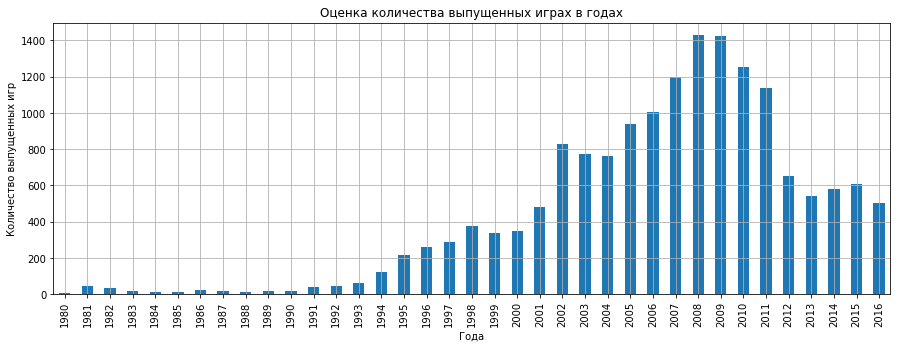

In [21]:
#проанализируем сколько игр выпускалось в разные годы

data.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(15, 5) )
plt.title('Оценка количества выпущенных играх в годах')
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Года')
plt.show()

Комментарий: По данной диаграмме заметен резкий рост выпруска с 2002 - 2010 года. После 2010 года наблюдается спад. Самым пиковым был период с 2008-2009 год. Для дальнейшего анализа возьмем только данные с 2008 года до 2016 года. 

<a id='Selection3.2'></a>

#### Анализ продаж игр по платформам

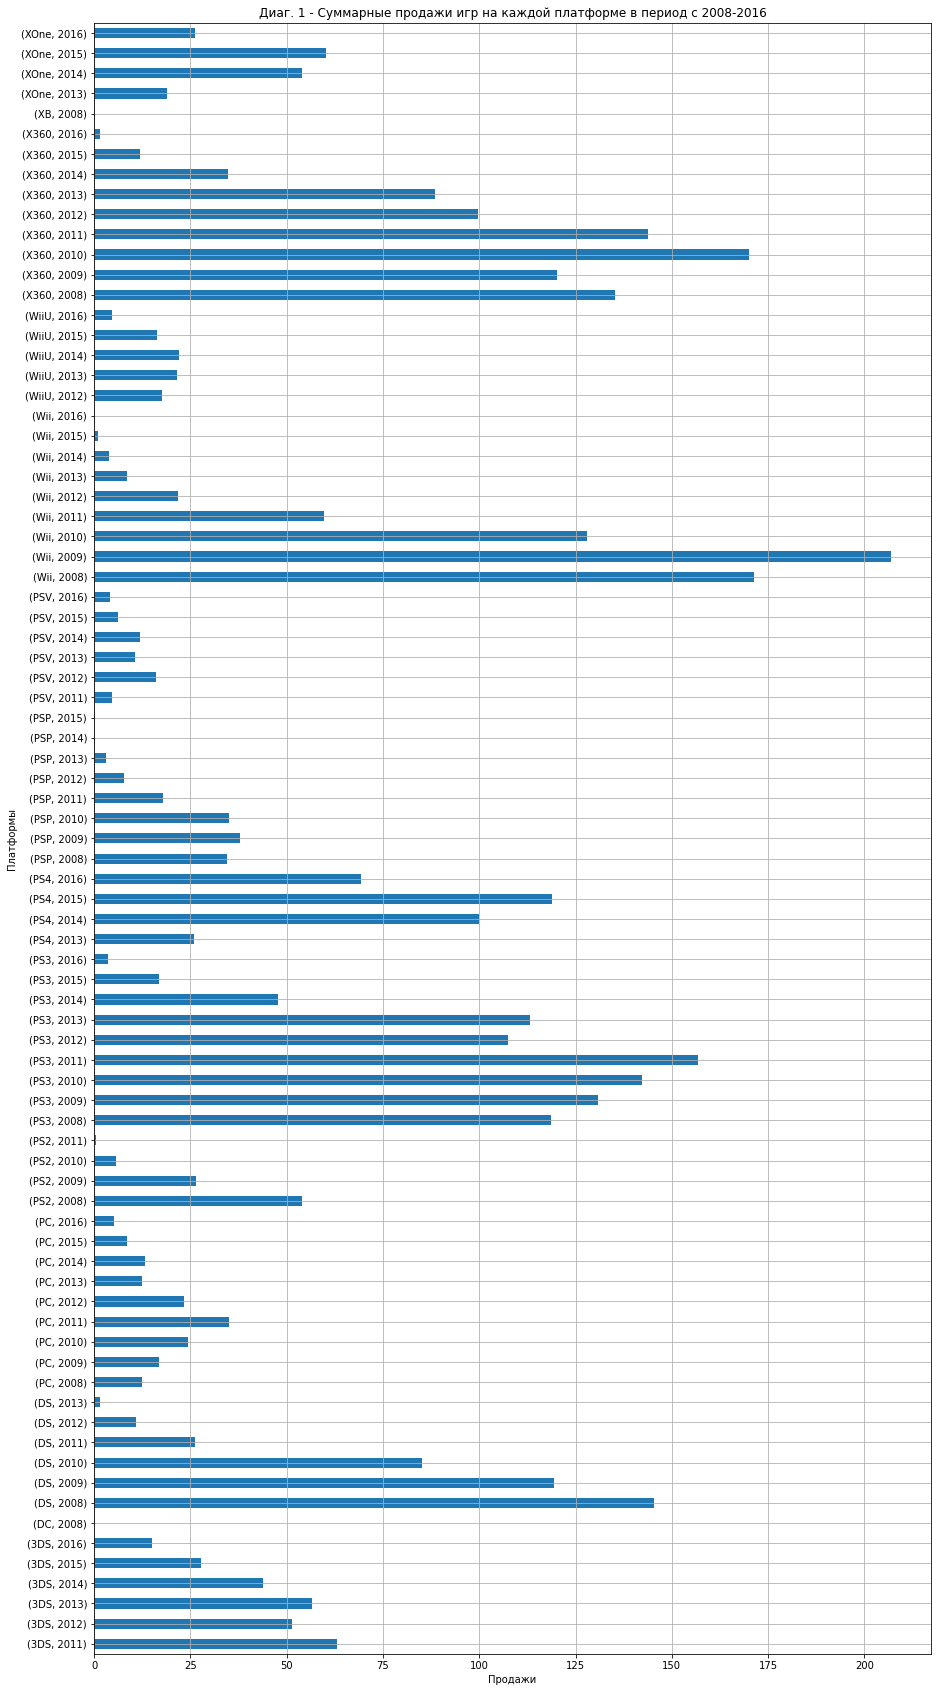

In [22]:
#проанализируем суммарные продажи игр на каждой платформе с 2008-2015 года

data.query("2008 <= year_of_release <= 2016").groupby(['platform', 'year_of_release'])['all_sales'].sum()\
.plot(kind='barh', grid=True, figsize=(15, 30))
plt.title('Диаг. 1 - Cуммарные продажи игр на каждой платформе в период с 2008-2016')
plt.ylabel('Платформы')
plt.xlabel('Продажи')
plt.show()

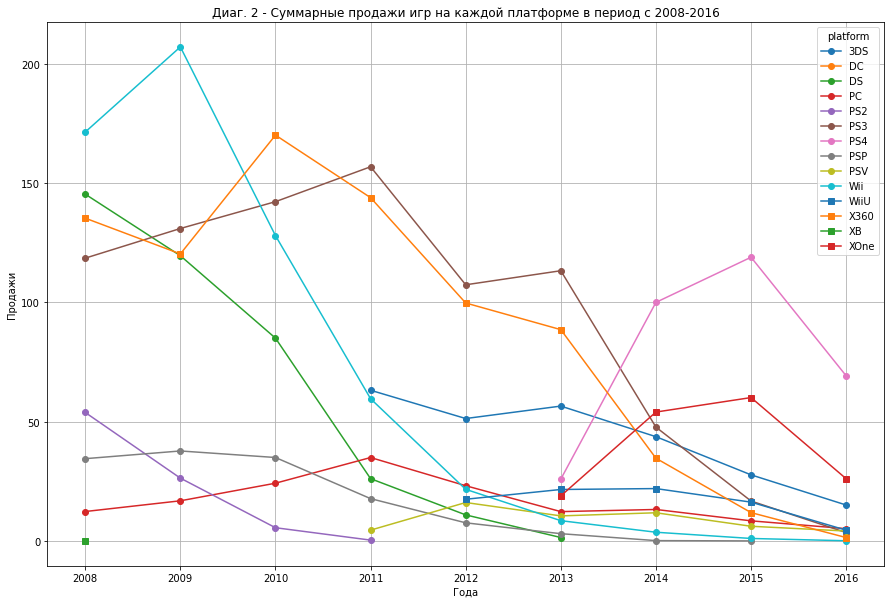

In [23]:
#проанализируем частоту появления новых платформ в период с 2008-2015 года
styles = ['o-'] * 10 + ['s-'] * 10 + ['^-'] * 10

data.query("2008<= year_of_release <= 2016").\
pivot_table(index='year_of_release', columns = 'platform', values='all_sales', aggfunc='sum').\
plot(style=styles, grid=True, figsize=(15, 10))
plt.title('Диаг. 2 - Cуммарные продажи игр на каждой платформе в период с 2008-2016')
plt.ylabel('Продажи')
plt.xlabel('Года')
plt.show()

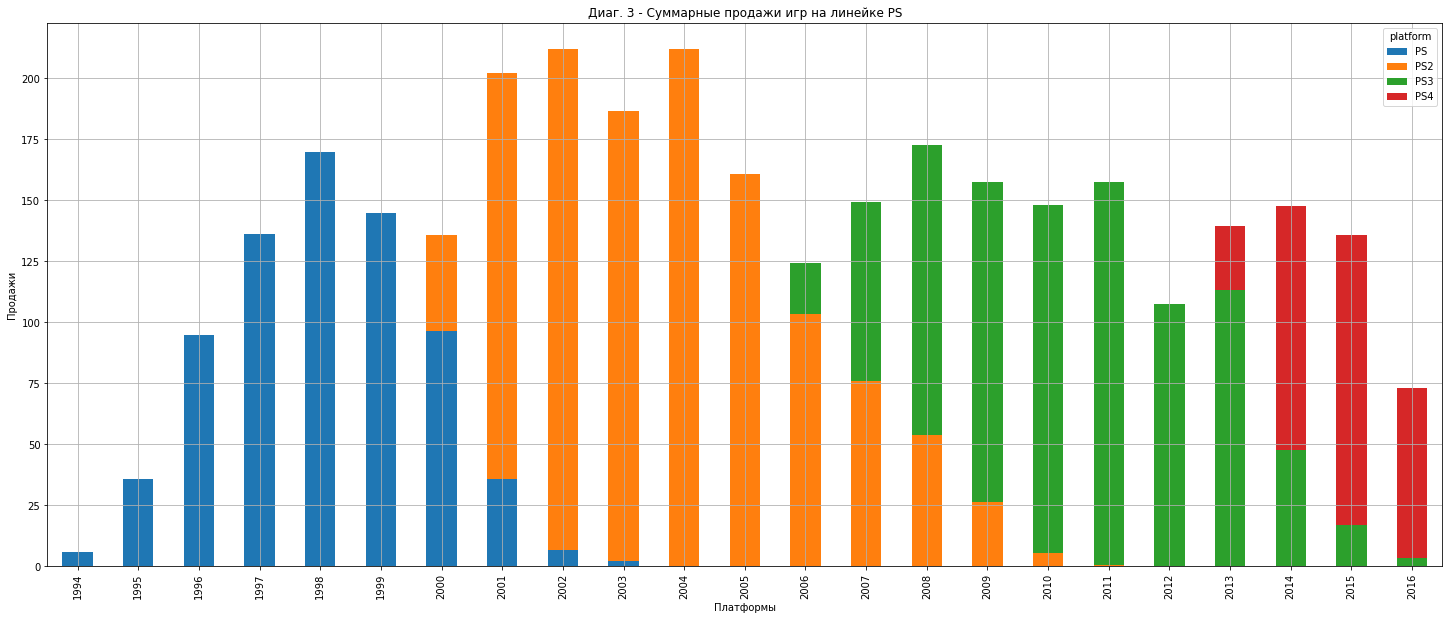

In [24]:
#проанализируем частоту появления новых платформ у линейки PS

data.query('platform == "PS" or platform == "PS2" or platform == "PS3" or platform == "PS4"').\
groupby(['platform', 'year_of_release'])['all_sales'].sum().unstack('platform')\
.plot(kind='bar', grid=True, figsize=(25, 10), stacked=True)
plt.title('Диаг. 3 - Cуммарные продажи игр на линейке PS')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: *По диаграммe 1* можно сделать вывод, что каждая новая платформа постепенно набирает популярность, достигает пика, за которым идет спад продаж. В среднем данный промежуток занимает от 5 до 8 лет. У наиболее популярных платформ данный процесс представлен наиболее выраженно, например, платформы PS3, PS4, Wii, X360.  

*Диаграмма 2* Если рассмотреть в целом частоту выпуска платформ от разных компаний в период с 2008-2016, то 2009 - 2010 не было выхода новых платформ, в 2011 - 2 новые платформы, в 2012 году - 1 новая платформа, 2013 году - 2 новые платформы., с 2014-2016 нет новых платформ. Закономерной динамики выпуска необнаружено. Поэтому возьмем самую крупную компанию и посмотрим динамику выхода платформ по ней.

*Диаграмма 3* У крупных компаний, которые значительное время держаться на рынке выпуск новых платформ и старение ранней версии происходит тогда, когда спад продаж наиболее выражен(PS-PS2-PS3-PS4). На диаграмме представлено появление и уход каждой платформы из выбранной линейки. Платформа PS была популярна с 1994 - 2003. В 1999 году продажи стали падать и 2000 году появилась пновая платформа PS2. Платформа PS2 была популярна с 2000 - 2011. В 2005 году продажи стали падать и 2006 году появилась пновая платформа PS3. То есть у крупных компаний, новые платформы появляются с частотой от 6 - 7 лет. Исходя из этого PS4 будет популярна в 2017 году.

Чтобы произвести более оптимальную динамику продаж, возьмем данные за последние 2 года. 


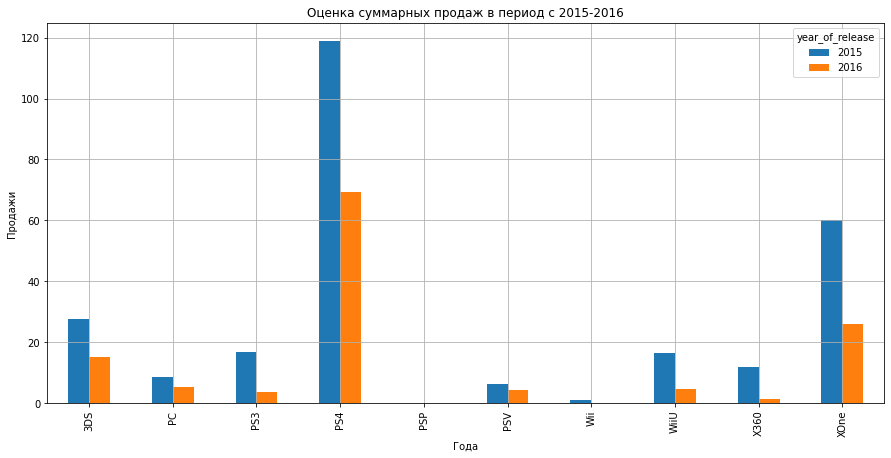

In [25]:
#построим распределение по выбранным годам суммарных продаж по платформам

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='platform',
    columns = 'year_of_release', values='all_sales',
    aggfunc='sum'
).plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Оценка суммарных продаж в период с 2015-2016')
plt.ylabel('Продажи')
plt.xlabel('Года')
plt.show()

Комментарий: В лидерах остаются 2 платформы: PS4, XOne, у которых суммарные продажи значительно больше остальных. Но из предыдущих графиков и выводов можно сказать, что популярность кажной из этих платформ находиться на стадии спада в той или инной степени. Это может говорить о скором выпуске совершенно новой платформы. Также популярными можно назвать платформы 3DS, WiiU. PS3 учитывать в анализе не будем так как уже есть более новая версия PS4. По такому же принципу X360 и XOne.  PC - составляет исключение из правил, так как для данной платформы(компьютеры) игр будут выпускаться всегда(пока будут актуальны компьютеры). Отсортируем данные по последним годам и популярным платформам   

In [26]:
#оставляем актуальные данные для дальнейшего анализа

data_new = data.query("2015 <= year_of_release <= 2016" and ('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "WiiU" or platform == "PC"'))

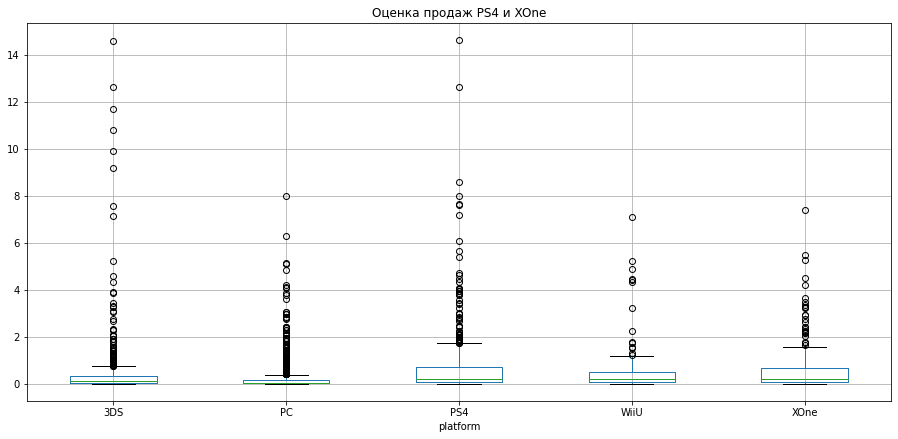

In [27]:
#строим «ящик с усами» по глобальным продажам игр в разбивке по платформам

data_new.boxplot(column='all_sales', by='platform', figsize=(15, 7))
plt.title('Оценка продаж PS4 и XOne')
plt.suptitle('') 
plt.show()


    Комметрарий: По данному графику можно сделать вывод, что количество проданных копий игр у платформам(PS4 и 3DS) имеет большое количество выбросов доходяших более 14 млн копий по сравнению с медианным значением. Также у платформ PS4 и XOne больше всех погоровые значения(усы), что свитетельстивет о крупных продажах разных игр до 2 млн копий, а те только единичных выбросах продаж. PC - стабильно выпускает игры и продает с выбросамии до 8 млн. WiiU имеет выбросы до 7,5 млн, но большие пороговые значение(после  PS4 и XOne). Все это говорит о том, выпущенные игры на данных площадках быстро залетают в топ и становятся быстро продаваемыми. Значит на данных площадках выпусккать новые игры на данный момент является актуальным и прибыльным делом.     

<a id='Selection3.3'></a>

#### Анализ влияния оценок пользователей и критиков на продажи игр

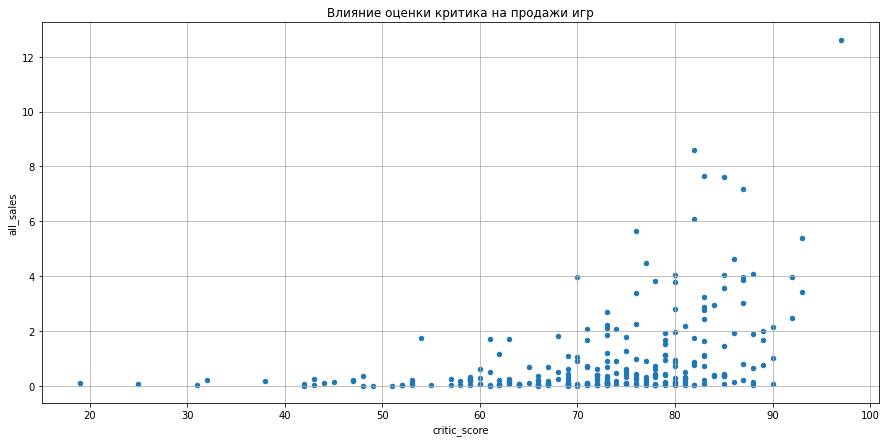

Кореляция: 0.2639215814721249


In [28]:
#стоим диаграмму рассеяния и определяем корреляцию между отзывами критиков и продажами

data_new.query('platform == "PS4"').plot(kind='scatter', x='critic_score', y='all_sales', grid=True, figsize=(15, 7))
plt.title('Влияние оценки критика на продажи игр')
plt.show()

print('Кореляция:', data_new['critic_score'].corr(data_new['all_sales']))

Комментарий: По данной диаграмме можно сделать вывод, что для выбранной платформы PS4 характерно большое количество игр с оценками критиков от 60 - 90 баллов. В среднем количество проданных копий до 2 млн. Есть отдельные выбросы свыше 12 млн проданных копий. Делаем вывод, что зависимость между оценкой в отзыве и продажами есть: наиболее высокая оценка может способствать большим продажам, но данная засимимоть не линейна, так как в разрезе до 2 млн копий представленоно множество игр с разными рейтингами. Что подтверждает коэффициент корреляции - 0,39.  

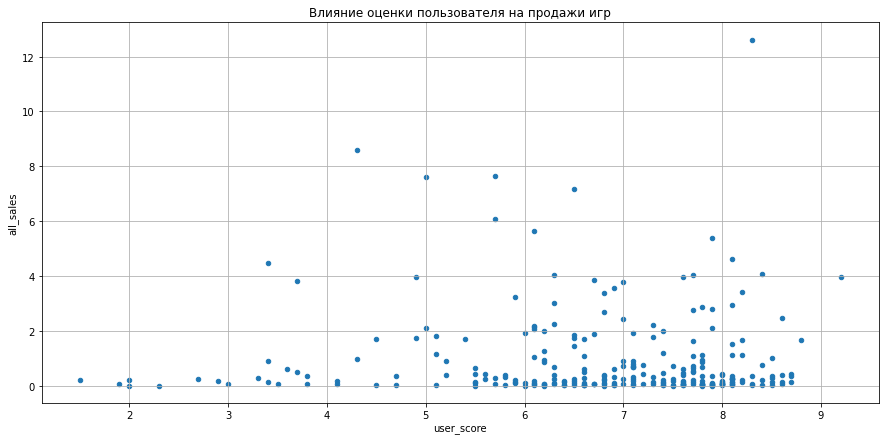

Кореляция: 0.02564031618973266


In [29]:
#стоим диаграмму рассеяния и определяем корреляцию между отзывами пользователей и продажами

data_new.query('platform == "PS4"').plot(kind='scatter', x='user_score', y='all_sales', grid=True, figsize=(15, 7))
plt.title('Влияние оценки пользователя на продажи игр')
plt.show()

print('Кореляция:', data_new['user_score'].corr(data_new['all_sales']))

Комментарий: По данной диаграмме можно сделать вывод, что для выбранной платформы PS4 характерно большое количество игр с оценками пользователей от 6 - 9 баллов. При этом видно, что есть выбросы значений и при рейтинге и 3 и 4 и 8. Поэтому зависимость между оценкой пользователей в отзыве и продажами не прослеживается: наиболее высокая оценка может способствать большим продажам, но не всегда. Данная засимимоть не линейна, что подтверждает коэффициент корреляции - 0, 036.  

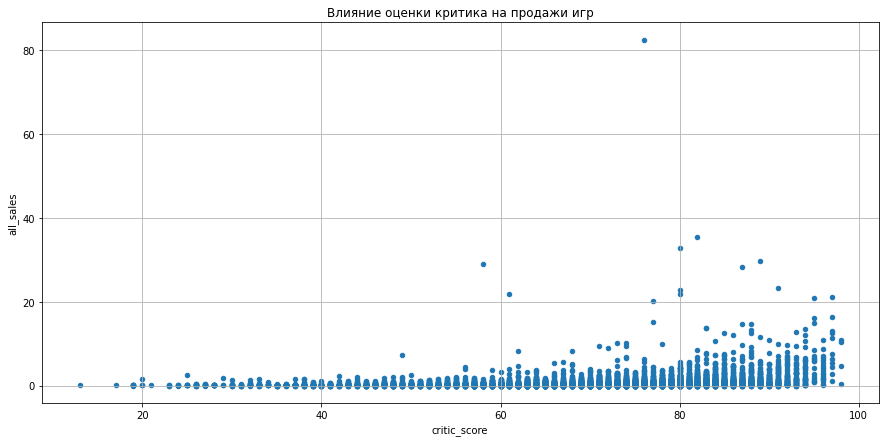

Кореляция: 0.2453488454741138


In [30]:
#стоим диаграмму рассеяния и определяем корреляцию между отзывами критиков и продажами по всем платформам

data.plot(kind='scatter', x='critic_score', y='all_sales', grid=True, figsize=(15, 7))
plt.title('Влияние оценки критика на продажи игр')
plt.show()

print('Кореляция:', data['critic_score'].corr(data['all_sales']))

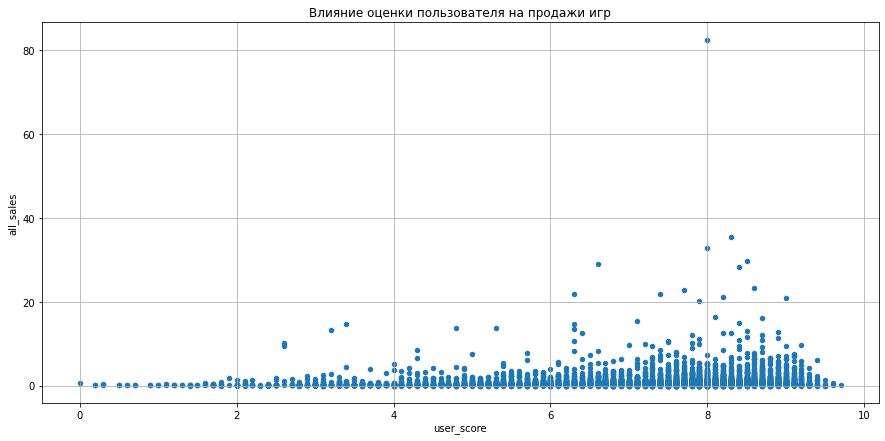

Кореляция: 0.08798399271321647


In [31]:
#стоим диаграмму рассеяния и определяем корреляцию между отзывами пользователей и продажами по всем платформам

data.plot(kind='scatter', x='user_score', y='all_sales', grid=True, figsize=(15, 7))
plt.title('Влияние оценки пользователя на продажи игр')
plt.show()

print('Кореляция:', data['user_score'].corr(data['all_sales']))

Комментарий: По общим данным можно подтвердить ранее сделанные выводы о зависимости оценки отзывов на продажи. Между оценками критиков и продажами зависимость имеет более выраженный характер, чем зависимость между оценками пользователей и продажами, при этом имеются значительные выбросы, которые не дают сделать вывод о линейности данной зависимости. 

<a id='Selection3.4'></a>

#### Анализ продаж игр по жанровым разновидностям

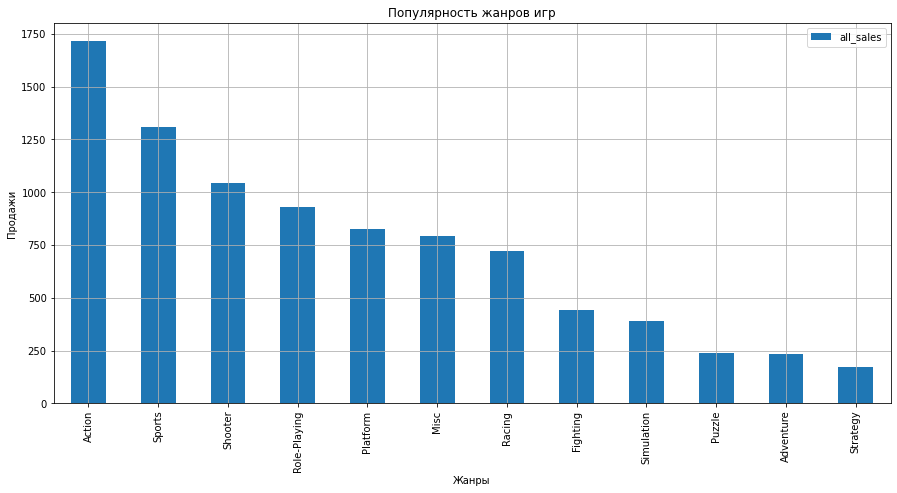

In [32]:
#построим распределение жанров и суммарных продаж 

data.pivot_table(
    index='genre',
    values='all_sales',
    aggfunc='sum'
)\
.sort_values(by = 'all_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Популярность жанров игр')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

По данной диаграмме можно сделать вывод, что самыми популярными жанрами являются: Action, Sports, Shooter, Role-Playing. Посмотрим популярность на отсортированных данных.

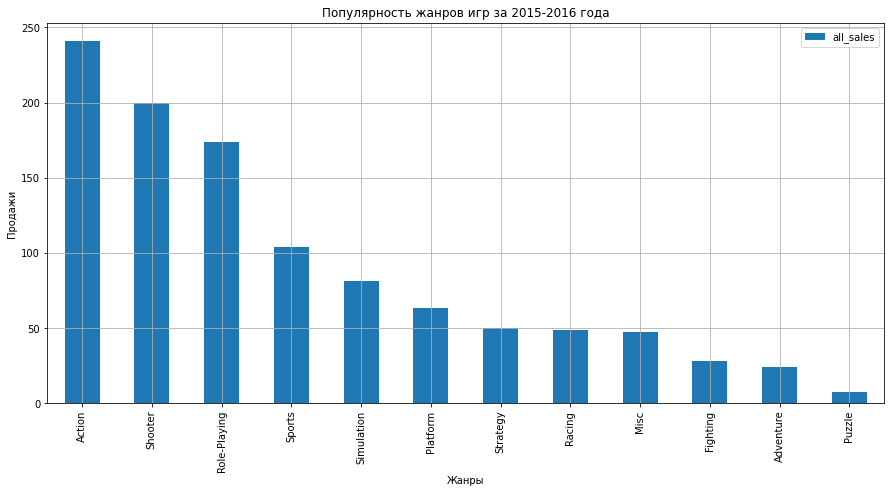

In [33]:
#построим распределение жанров и суммарных продаж за период 2015-2016 года на самых популярных платформах

data_new.pivot_table(
    index='genre',
    values='all_sales',
    aggfunc='sum'
)\
.sort_values(by = 'all_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Популярность жанров игр за 2015-2016 года')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: По отсортированных данным за последние 2 года популярность выбранных ранее жанров осталась прежней, но поменялись лидеры. Жанр  Shooter сиал самым популярным, далее идет жанр Action, затем Sports и значительно меньше продаж у жанра Role-Playing. Но данные жанры по-прежнему лидируют по сравнению с другими жанрами в зачительном отрыве.

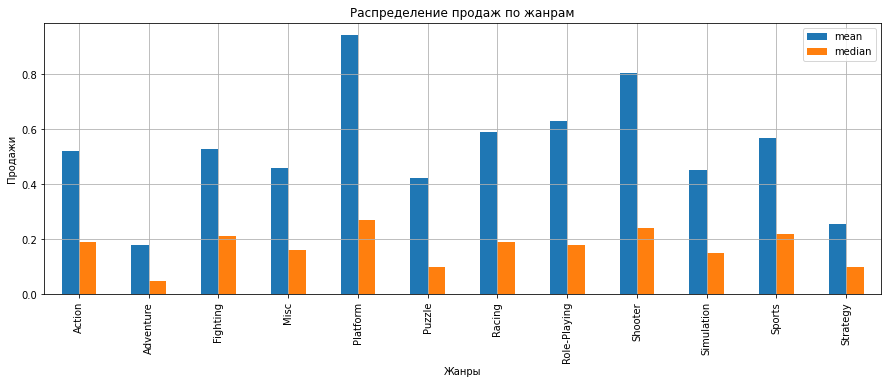

In [34]:
# построим распределение медианных продаж по жанрам 

data.pivot_table(index='genre', values='all_sales', aggfunc={'mean', 'median'})\
.plot(kind='bar', grid=True, figsize=(15, 5))
plt.title('Распределение продаж по жанрам')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Исходя из медианных и средних значений суммарных продаж, самыми стабильно продаваемыми являются жанры:
- Platform
- Shooter
- Sports

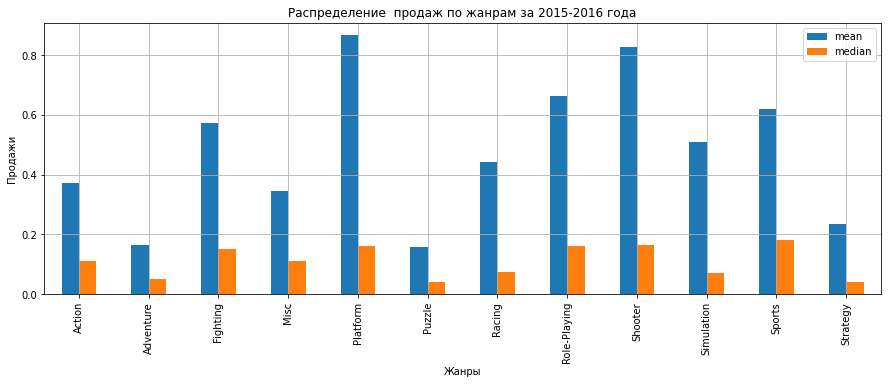

In [35]:
# построим распределение медианных продаж по жанрам за 2015-2016 года на самых популярных платформах

data_new.pivot_table(index='genre', values='all_sales', aggfunc={'mean', 'median'})\
.plot(kind='bar', grid=True, figsize=(15, 5))
plt.title('Распределение  продаж по жанрам за 2015-2016 года')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Исходя из медианных и средних значений суммарных продаж за последние 2 года, самыми стабильно продаваемыми являются жанры:
- Platform
- Shooter
- Sports
- Action
- Racing


    **Вывод по разделу**
    
    Был проведен исследовательский анализ. Оценили количество выпущенных игр с группировкой по годам. После выгрузки данных выделили пики популярности игр с 2008-2010. Чтобы произвести более оптимальную динамику продаж, возьмем данные за последние 2 года. Далее мы посчитали суммарное количество продаж по каждой платформе. По изучению суммарных показателей продаж мы можем выделить самые продаваемые платформы:
- PS4 
- XOne
- 3DS
- PC 
- WiiU   
   
    Оценили влияние оценкок критиков и пользователей на продажи. Зависимость имеет более выраженный характер между оценками критиков и продажами, чем зависимость между оценками пользователей и продажами, при этом имеются значительные выбросы, которые не дают сделать вывод о линейности данной зависимости. По жанровым предпочтениям  Shooter стал самым популярным жанром, далее идет жанр Action, затем Sports и значительно меньше продаж у жанра Role-Playing. При оценки стабильности продаваемых жанров было выявлено, что за последние 2 года наиболее стабильны продажи жанров Platform,Shooter, Sports,Action. 

<a id='Selection4'></a>

### Составление портрета пользователя каждого региона

<a id='Selection4.1'></a>

#### Определение портрета  пользователя для NA региона (Северная Америка)

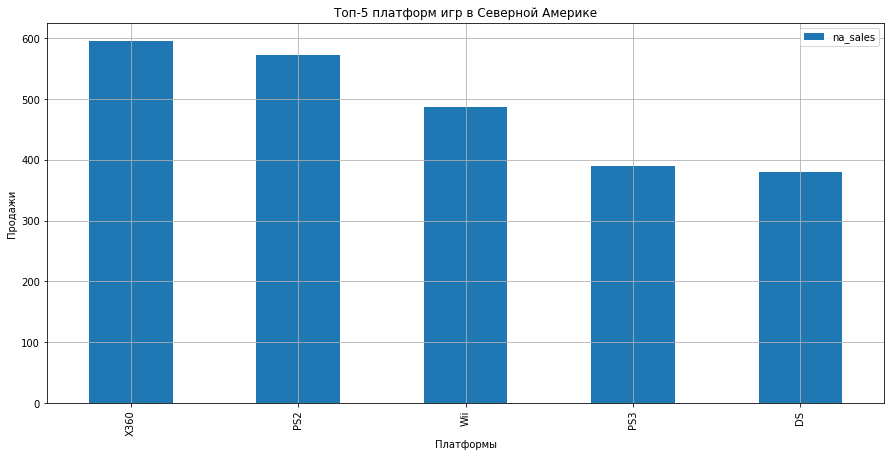

In [36]:
#определяем топ - 5 самые популярные платформы

data.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Топ-5 платформ игр в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: Топ-5 платформ для Северной Америки:
- X360
- PS2
- Wii
- PS3
- DS
Разница между позициями в топе между первыми друмя незначительная(около 20 тыс копий). Между вторым и третьим местом уже разница около 70 тыс копий. Между третьим и четвертым больше 100 тыс копий. Между четвертым и пятым разница не значительная. Эти данные только подтверждают популярность самых топовых платформ.  

In [37]:
# считаем долю продаж в Северной Америке по общим продажам 

data_na = data.query('platform == "X360" or platform == "PS2" or platform == "Wii" or platform == "PS3" or platform == "DS"')

proportion_na = data_na.groupby('platform')['na_sales'].sum()/ data_na.groupby('platform')['all_sales'].sum()

print('Доля продаж в Северной Америке:')

print(proportion_na.sort_values(ascending=False))

Доля продаж в Северной Америке:
platform
X360    0.619762
Wii     0.546321
DS      0.473741
PS2     0.464444
PS3     0.418891
dtype: float64


Комментарий: Представлена доля продаж топовых позиций для Северной Америки по отношению к общим продажам по данным платформам. Можно сказать, что доля продаж держится от 42% - 62% от общего числа. 

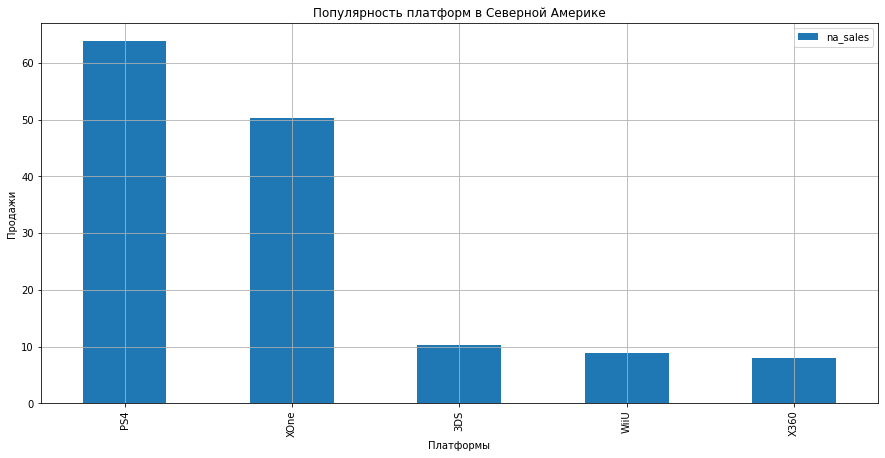

In [38]:
#определяем топ - 5 самые популярные платформы за последние 2 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
).sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Популярность платформ в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: За последние 2 года топ-5 платформ выглядит несколько иначе. Это связано с выпуском более новых версий платформ на базе старых. Популярность PS2 стала падать еще в 2010 году, а PS3 в 2013 с выходом PS4. Тоже самое произошло X360 и Xone, DC и DC3, Wii и WiiU. Список остался практически тем же с незначительными изменениями позиций, произошла замена на более современные версии. Разница между первыми двумя и остальными местами в топе значительна и связана с тем, что последние три платформы уже находятся на спадии спада продаж по диаграммам выше и скорее вместо будут не актуальными в последующие года. 
Топ-5 за 2015-2016 года будет:
- PS4
- Xone


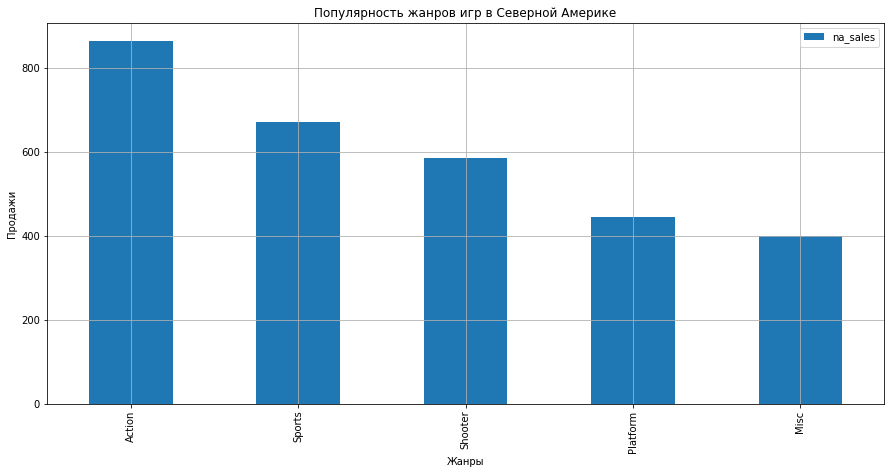

In [39]:
#определяем топ - 5 самые популярные жанры

data.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Популярность жанров игр в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Северной Америки:
- Action
- Sports
- Shooter
- Platform
- Misc

Жанр Action опережает жанр Sports почти на 200 млн проданных копий. Разница между вторым и третьим местом почти в два раза меньше - 100 млн копийю Между третьи и четвертым около 150 млн копий. И разница между четвертым и пятым местом совсем мала около 50 млн копий.


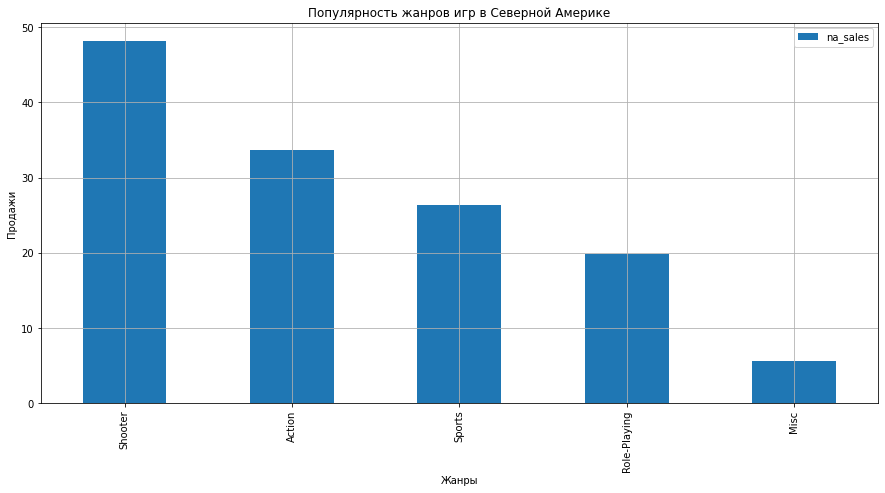

In [40]:
#определяем топ - 5 самые популярные жанры за 2015-2016 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
).sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Популярность жанров игр в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Северной Америки за последние 2 года потерпел незначительные изменения. В лидеры выбился жанр Shooter, далее Action, Sports, набрал популярность жанр Role-Playing и Misc попрежнему на последнем месте.

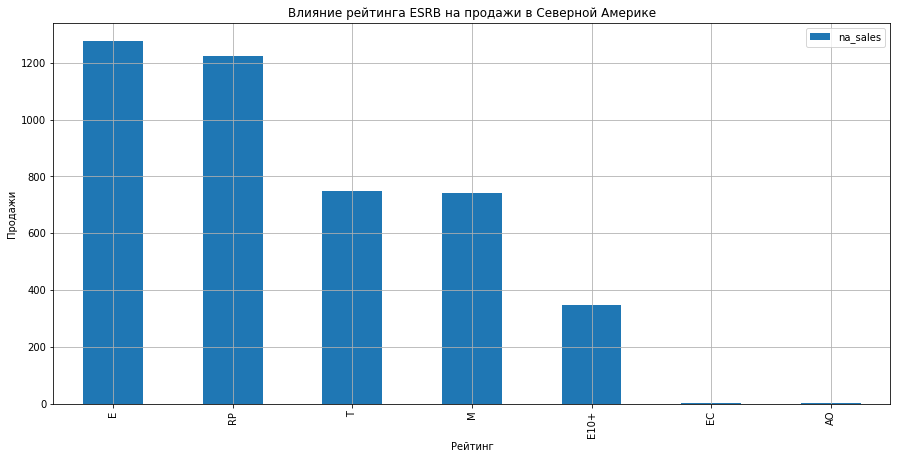

In [41]:
#определяем влияние рейтинга ESRB на продажи в регионе

data.pivot_table(
    index='rating',
    values='na_sales',
    aggfunc='sum'
)\
.sort_values(by = 'na_sales', ascending=False)\
.plot(kind='bar', grid=True, figsize=(15, 7))
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Комментарий: По диаграмме можно сделать вывод, что самими продаваемыми являются игры с рейтингом E - «Для всех», содержание которых подходит для всех возрастов. Рейтинг «RP» — «Рейтинг ожидается» находится на втором месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя. Почти в равных долях находятся продажи для рейтинга T («Teen») — «Подросткам» - игра подходит для лиц от 13 лет и рейтинга M («Mature») — «Для взрослых» - материалы игры не подходят для лиц младше 17 лет.  


**Вывод о портрете пользователя Северной Америки**
Пользователи из Северной Америки, увлекающиеся компьютерными играми предпочитают играть на платформах: PS4 и Xone. ВЫбирают игры в жанрах Shooter, Action, Sports, Role-Playing и Misc. 

<a id='Selection4.2'></a>

#### Определение портрета  пользователя для EU  региона (Европа)

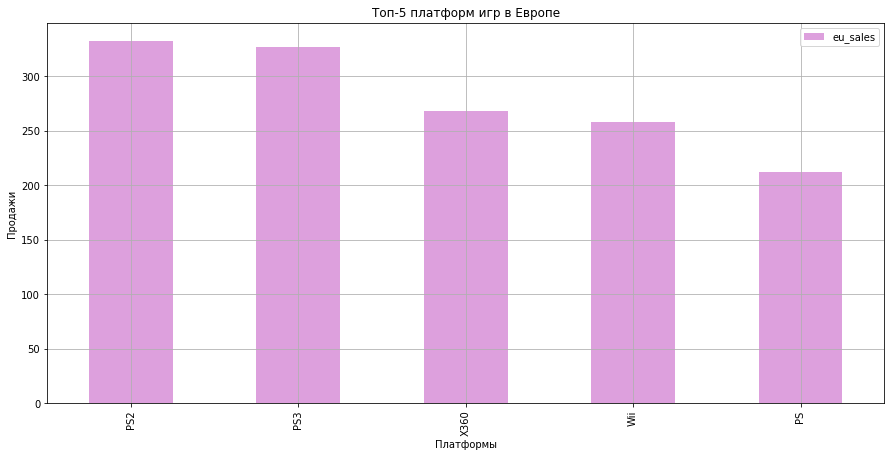

In [42]:
#определяем топ - 5 самые популярные платформы

data.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='plum', figsize=(15, 7))
plt.title('Топ-5 платформ игр в Европе')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: Топ-5 платформ для Европы: 
- PS2
- PS3
- X360
- Wii
- PS

Разница между позициями в топе между первыми друмя незначительная(около 10 тыс копий). Между вторым и третьим местом уже разница около 50 тыс копий. Между третьим и четвертыми пятым разница не значительная. Эти данные подтверждают, что лидеры значительно выбиваются из других платформ.

In [43]:
# считаем долю продаж в Европе по общим продажам 

data_eu = data.query('platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "PS2" or platform == "PS"')

proportion_eu = data_eu.groupby('platform')['eu_sales'].sum()/ data_eu.groupby('platform')['all_sales'].sum()

print('Доля продаж Европе:')

print(proportion_eu.sort_values(ascending=False))

Доля продаж Европе:
platform
PS3     0.351332
PS      0.291913
Wii     0.289863
X360    0.279139
PS2     0.269650
dtype: float64


Комментарий: Представлена доля продаж топовых позиций для Европы по отношению к общим продажам по данным платформам. Можно сказать, что доля продаж держится от 27% - 35% от общего числа. Эти данные значительно меньше чем в Северной Америке. 

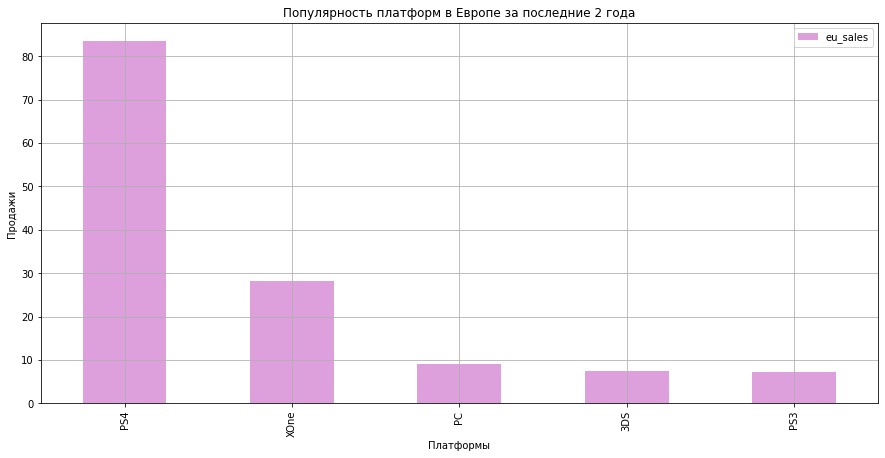

In [44]:
#определяем топ - 5 самые популярные платформы за последние 2 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='plum', figsize=(15, 7))
plt.title('Популярность платформ в Европе за последние 2 года')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: Также за последние 2 года топ-5 платформ выглядит несколько иначе. Это связано с выпуском более новых версий платформ на базе старых. Топ-5 за 2015-2016 года будет:
- PS4 (со значительным отрывом)
- Xone

Остальные платформы находятся уже на стадии падения популярности.

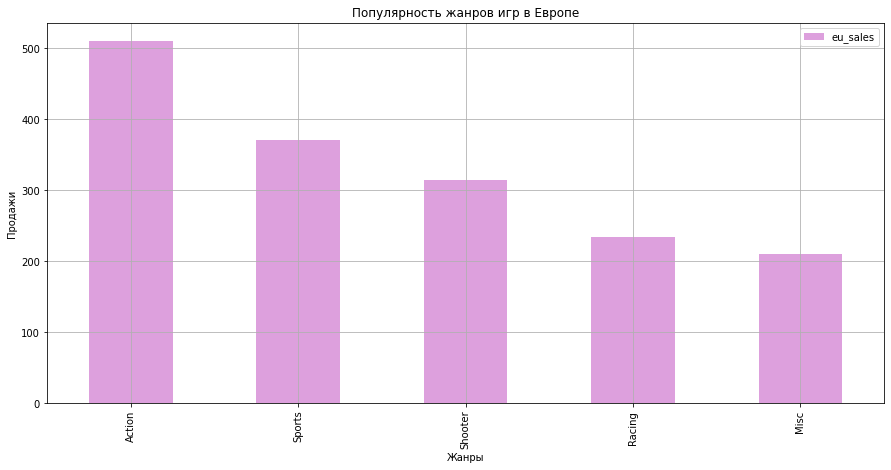

In [45]:
#определяем топ - 5 самые популярные жанры

data.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='plum', figsize=(15, 7))
plt.title('Популярность жанров игр в Европе')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Европы:
- Action
- Sports
- Shooter
- Platform
- Misc

Жанр Action опережает жанр Sports почти на 150 млн проданных копий. Разница между вторым и третьим местом  - 50 млн копий. Между третьи и четвертым около 70 млн копий. И разница между четвертым и пятым местом совсем мала около 30 млн копий. Список жанров совпадает с жанрами в Северной Америки.


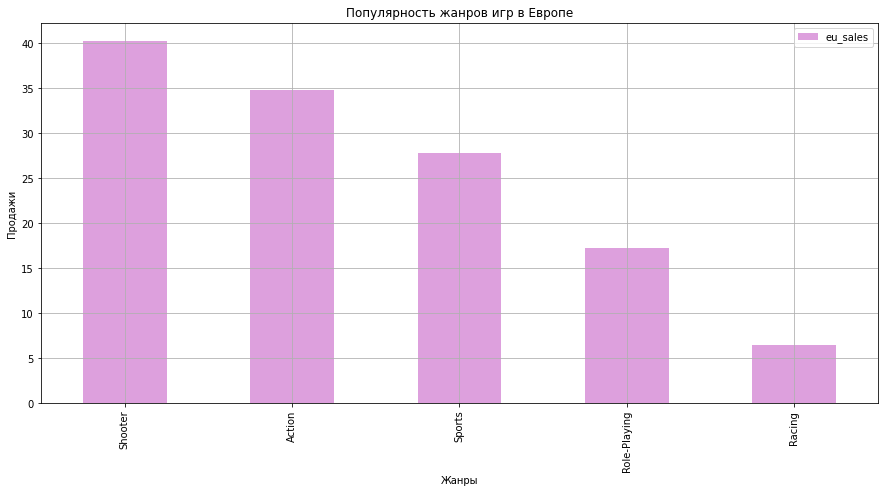

In [46]:
#определяем топ - 5 самые популярные жанры за 2015-2016 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
).sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='plum', figsize=(15, 7))
plt.title('Популярность жанров игр в Европе')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Европы за последние 2 года потерпел незначительные изменения. В лидеры выбился жанр Shooter, далее Action, Sports, набрал популярность жанр Role-Playing и Misc попрежнему на последнем месте. Данные также совпадают с данными по Северной Америке.

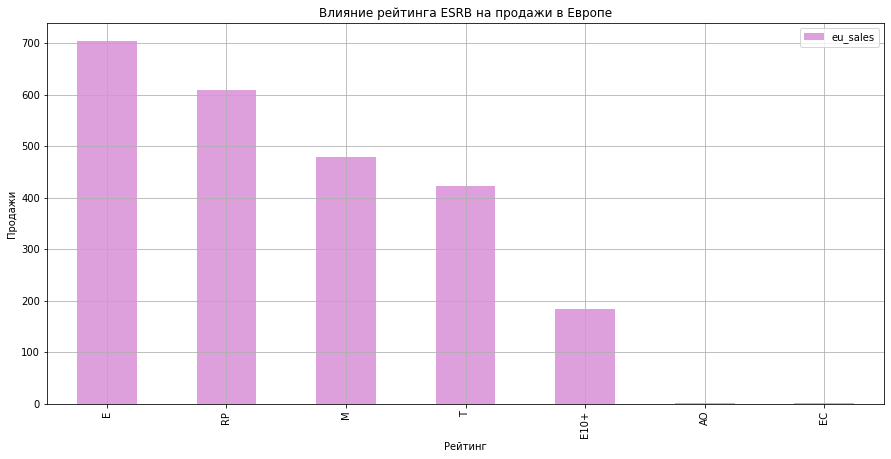

In [47]:
#определяем влияние рейтинга ESRB на продажи в регионе

data.pivot_table(
    index='rating',
    values='eu_sales',
    aggfunc='sum'
)\
.sort_values(by = 'eu_sales', ascending=False)\
.plot(kind='bar', grid=True, color='plum', figsize=(15, 7))
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Комментарий: По диаграмме можно сделать вывод, что самими продаваемыми являются игры с рейтингом E - «Для всех», содержание которых подходит для всех возрастов. Рейтинг «RP» — «Рейтинг ожидается» находится на втором месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя.  Почти в равных долях находятся продажи для рейтинга T («Teen») — «Подросткам» - игра подходит для лиц от 13 лет и рейтинга M («Mature») — «Для взрослых» - материалы игры не подходят для лиц младше 17 лет.


**Вывод о портрете пользователя Европы**
Пользователи из Европы, увлекающиеся компьютерными играми предпочитают играть на платформах: PS4 и Xone. ВЫбирают игры в жанрах Shooter, Action, Sports, Role-Playing и Misc. 

<a id='Selection4.3'></a>

#### Определение портрета пользователя для JP региона (Япония)

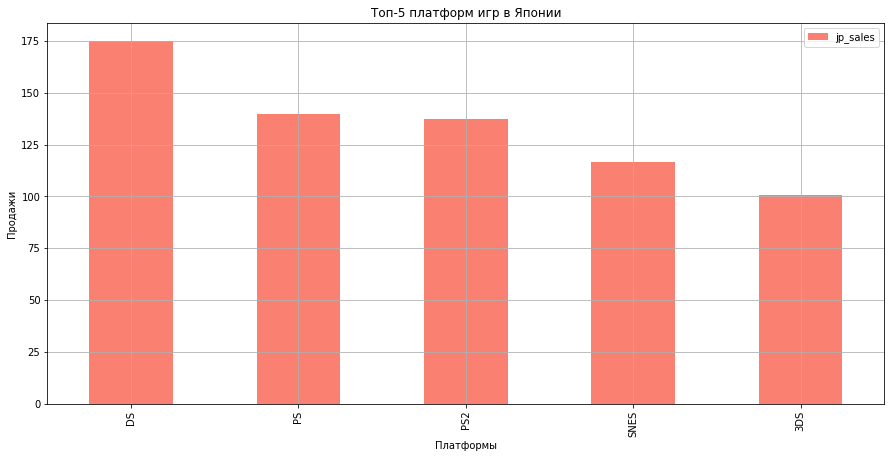

In [48]:
#определяем топ - 5 самые популярные платформы

data.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='salmon', figsize=(15, 7))
plt.title('Топ-5 платформ игр в Японии')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: Топ-5 платформ для Европы:
- DC
- PS
- PS2
- SNES
- 3DS

В рейтинге по Японии заметны отличия от двух других топ-5. Здесь разница в  между позициями в топе самая маленькая. Между первым и вторым местом - чуть больше 25 мнл копий. Второе и третье место поровну. Между третьи и четвертым разница около 20 млн копий. Между четвертыми и пятым разница около 15 мнл копий. Также можно отметить, что в данном топе появляется платформа SNES. Данная американская платформа была популярна в 90-х годах и стала самой продаваемой имеено в Японии.

In [49]:
# считаем долю продаж в Европе по общим продажам 

data_jp = data.query('platform == "DC" or platform == "PS" or platform == "SNES" or platform == "PS2" or platform == "3DS"')

proportion_jp = data_jp.groupby('platform')['jp_sales'].sum()/ data_jp.groupby('platform')['all_sales'].sum()

print('Доля продаж Японии:')

print(proportion_jp.sort_values(ascending=False))

Доля продаж Японии:
platform
SNES    0.582633
DC      0.536677
3DS     0.390287
PS      0.192116
PS2     0.111498
dtype: float64


Комментарий: Представлена доля продаж топовых позиций для Японии по отношению к общим продажам по данным платформам. Можно сказать, что доля продаж имеет большой разбег от 11% - 58% от общего числа. Эти данные значительно меньше чем в Северной Америке.

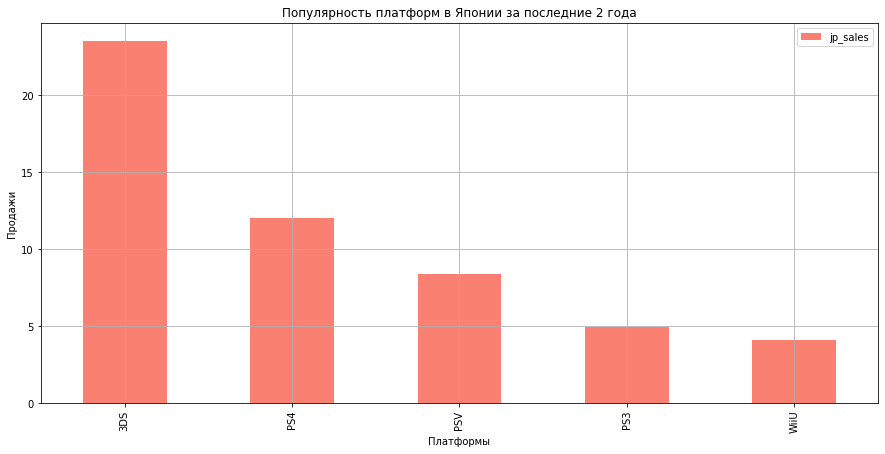

In [50]:
#определяем топ - 5 самые популярные платформы за последние 2 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='salmon', figsize=(15, 7))
plt.title('Популярность платформ в Японии за последние 2 года')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show()

Комментарий: Также за последние 2 года топ-5 платформ выглядит несколько иначе. Это связано с выпуском более новых версий платформ на базе старых. Топ-5 за 2015-2016 года для Японии будет:
- 3DS (со значительным отрывом)
- PS4

Здесь можно отметить амоналию платформы 3DS. Данная платформа находятся уже на стадии падения популярности, но в Японии продолжает бить рекорды продаж. Возможно это связано с поддержкой местного производителя(PS4 тоже принадлежит японской компании) и его огромной популярностью (SNES и 3DS платформы от японской компании Nintendo).

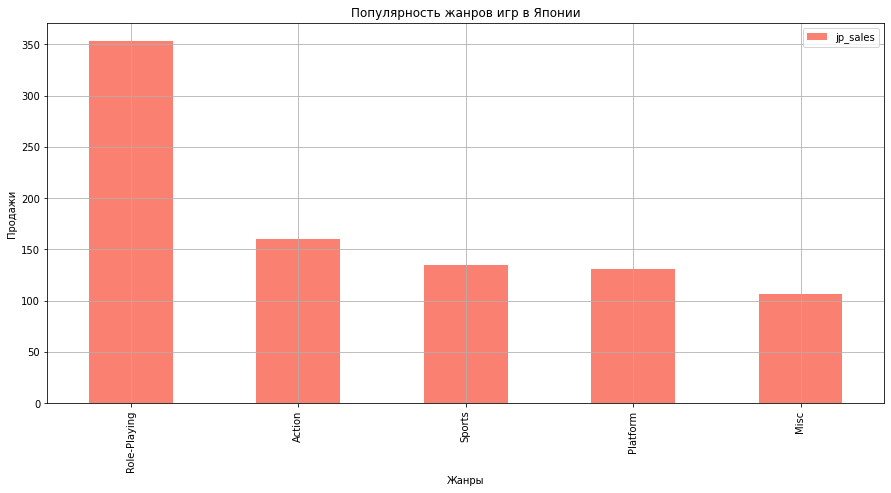

In [51]:
#определяем топ - 5 самые популярные жанры

data.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='salmon', figsize=(15, 7))
plt.title('Популярность жанров игр в Японии')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Японии:
- Role-Playing
- Action
- Sports
- Platform
- Misc

Жанр Role-Playing для рынка Японии является лидером со значительным отрывом. Остальной список жанров совпадает с жанрами в Северной Америки в той же последовательности, но уже с меньшими продажами

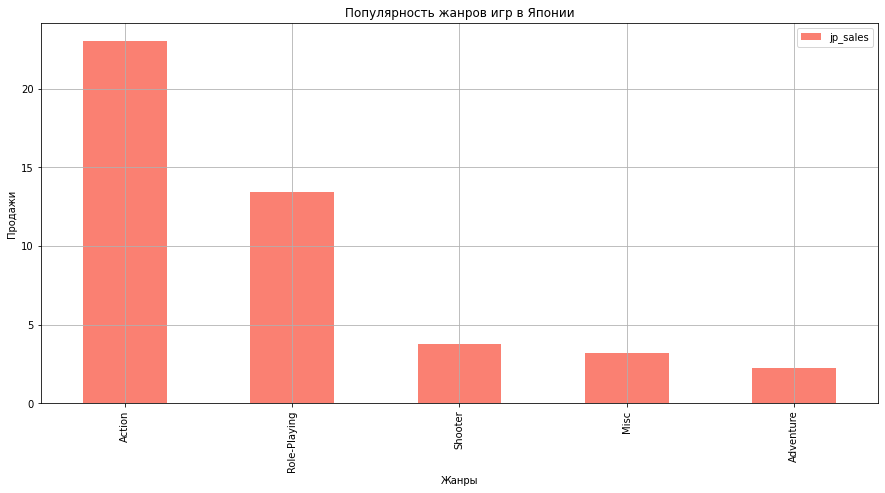

In [52]:
#определяем топ - 5 самые популярные жанры за 2015-2016 года

data.query("2015 <= year_of_release <= 2016").pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
).sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='bar', grid=True, color='salmon', figsize=(15, 7))
plt.title('Популярность жанров игр в Японии')
plt.ylabel('Продажи')
plt.xlabel('Жанры')
plt.show()

Комментарий: Топ-5 жанров для Японии за последние 2 года значительно изменился. В лидеры выбился жанр Action, далее Role-Playing, набрал популярность жанр Shooter, далее Misc и снова новый жанр Adventure.

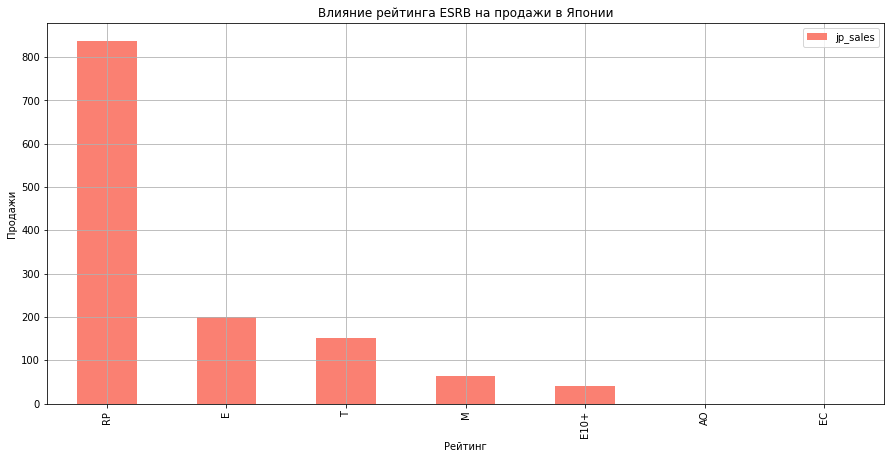

In [53]:
#определяем влияние рейтинга ESRB на продажи в регионе

data.pivot_table(
    index='rating',
    values='jp_sales',
    aggfunc='sum'
)\
.sort_values(by = 'jp_sales', ascending=False)\
.plot(kind='bar', grid=True, color='salmon', figsize=(15, 7))
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Комментарий: По диаграмме можно сделать вывод, что рейтинг «RP» — «Рейтинг ожидается» находится на первом месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя.  Самими продаваемыми продолжпют оставаться игры с рейтингом E - «Для всех», содержание которых подходит для всех возрастов. Для Японии разница между рейтингом T («Teen») — «Подросткам» и рейтинга M («Mature») — «Для взрослых» - значительная с большим преимуществом T («Teen»).

**Вывод о портрете пользователя Японии**
Пользователи из Японии, увлекающиеся компьютерными играми предпочитают играть на платформах: 3DS и PS4. ВЫбирают игры в жанрах Action, Role-Playing, Misc, Shooter и Adventure.

<a id='Selection5'></a>

### Статистический анализ данных

<a id='Selection5.1'></a>

#### Проверка гипотезы 1

Для проверки гипотезы 1 "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" берем следующие гипотезы:

H0: средние пользовательские рейтинги по платформам одинаковые

H1: средние пользовательские рейтинги по платформам разные

alpha = 0.05

In [54]:
# задаем массивы, содержащие выборки 

data_user_xone = data.query("2015 <= year_of_release <= 2016").loc[data['platform'] == 'XOne', 'user_score'] >=0
data_user_pc = data.query("2015 <= year_of_release <= 2016").loc[data['platform'] == 'PC', 'user_score'] >=0

results = st.ttest_ind(data_user_xone,data_user_pc)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.12186935388592249
Не получилось отвергнуть нулевую гипотезу


Комментарий: Данные по пользовательским рейтингам платформ Xbox One и PC не дают основания отвергнуть, что средние значения одинаковые.

<a id='Selection5.1'></a>

#### Проверка гипотезы 2

Для проверки гипотезы 2 "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" берем следующие гипотезы:

H0: средние пользовательские рейтинги по жанрам одинаковые

H1: средние пользовательские рейтинги по жанрам разные

alpha = 0.05

In [55]:
# задаем массивы, содержащие выборки 

data_user_action = data.query("2015 <= year_of_release <= 2016").loc[data['genre'] == 'Action', 'user_score'] >=0
data_user_sports = data.query("2015 <= year_of_release <= 2016").loc[data['genre'] == 'Sports', 'user_score'] >=0

results = st.ttest_ind(data_user_action,data_user_sports)
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 2.1609605663662673e-09
Отвергаем нулевую гипотезу


Комментарий: Вероятность получить одинаковые данные по средним пользовательским рейтингам жанров очень низка, поэтому появляется основание отбросить эту нулевую гипотезу. 

<a id='Selection6'></a>

### Общий вывод

Исходный файл -  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года из интернет-магазина «Стримчик». Задача заключается в предобработки данных для поиска принцип работы с данными для прогрозирования продаж на будущие года.

**Первый этап**

На первом этапе были изучены полученные данные.  Было обнаружено множество пропусков, неявных дубликатов и аномальных значений, которые по логическим убеждениям мешали оценивать данные. Также обраружены не соответствие стандарта по названию столбцов и несоответствие типов данных в столцах исходя из их названия и содержания.

**Второй этап**

На второ этапе заниались предобработкой данных. Изменили названия столбцов пктем приведения их к нижнему регистру. В столбцах Name и Year_of_Release количество пропусков меньше 3%, поэтому удалили данные пропуски. Пропуски в столбцах user_score и critic_score составляют больше 50 % от всех данных. Так как оценка пользователя или критика - это единица измерения в данном случае конкретной игры, то заполнить пропуски мы не можем из-за отсутствия информации. В столбце rating заенили пропуски на значения 'RP' - «Рейтинг ожидается». Неявные дубликаты и аномальные значения в столбцах user_score и rating были удалены.  Произвели замену типов данных в стобцах year_of_release и user_score. Для проверения дальнейшего анализа были посчитаны суммарные продажи во всех регионах и добавлен новый столбец.

**Третий этап**

Исследовательский анализ данных. На данном этапе посмотрели сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие жанры игр популярнее, как влияют на продажи отзывы пользователей и критиков. По данным обнаружили резкий рост выпуска игр с 2002 - 2010 года. После 2010 года наблюдается спад. А также проанализировали прожади в разные года по платформам. Отметили жизненный цикл платформы, который похож на нормальное распределение в среднем течении 5-8 лет. Оценили частоту появления новых платформ. У крупных компаний, которые значительное время держаться на рынке выпуск новых платформ и старение ранней версии происходит тогда, когда спад продаж наиболее выражен. Для анализа взяли группу PS-PS2-PS3-PS4. Платформа PS была популярна с 1994 - 2003. В 1999 году продажи стали падать и 2000 году появилась пновая платформа PS2. Платформа PS2 была популярна с 2000 - 2011. В 2005 году продажи стали падать и 2006 году появилась пновая платформа PS3. То есть у крупных компаний, новые платформы появляются с частотой от 6 - 7 лет. Исходя из этого PS4 будет популярна в 2017 году. Чтобы произвести более оптимальную динамику продаж, оставили данные за последние 2 года(2015-2016).
Выявили, что:
По изучению суммарных показателей продаж мы можем выделить самые продаваемые платформы:
- PS4 
- XOne
- 3DS
- PC 
- WiiU   
   
Оценили влияние оценкок критиков и пользователей на продажи. Зависимость имеет более выраженный характер между оценками критиков и продажами, чем зависимость между оценками пользователей и продажами, при этом имеются значительные выбросы, которые не дают сделать вывод о линейности данной зависимости. По жанровым предпочтениям  Shooter стал самым популярным жанром, далее идет жанр Action, затем Sports и значительно меньше продаж у жанра Role-Playing. При оценки стабильности продаваемых жанров было выявлено, что за последние 2 года наиболее стабильны продажи жанров Platform, Shooter, Sports,Action. 

По жанровым предпочтениям  Shooter стал самым популярным жанром, далее идет жанр Action, затем Sports и значительно меньше продаж у жанра Role-Playing. При оценки стабильности продаваемых жанров было выявлено, что за последние 2 года наиболее стабильны продажи жанров Shooter, Sports,Action. 

Оценили влияние оценкок критиков и пользователей на продажи. Зависимость имеет более выраженный характер между оценками критиков и продажами, чем зависимость между оценками пользователей и продажами, при этом имеются значительные выбросы, которые не дают сделать вывод о линейности данной зависимости. 

**Четыертый этап**

Составление портрета пользователя каждого региона. Определили топ-5 платформ и жанров для каждого исследуемого региона, досмотрели долю продаж и влияние рейтинга ESRB на популярность и продажи. 

*Северная Америка*
За последние 2 года топ-5 платформ:
- PS4 (с незначительным отрывом в 10 млн копий)
- XOne

Разница между первыми двумя и остальными местами в топе значительна и связана с тем, что последние три платформы уже находятся на спадии спада продаж скорее вместо будут не актуальными в последующие года, поэтому в топ только 2 позиции.
Доля продаж игр на разные платформы в Северной Америке самая высокая по сравнению с другими регионами в общем количестве продаж.

Топ-5 жанров за последние 2 года: 
- Shooter
- Action
- Sports
- Role-Playing 
- Misc 

С точки зрения рейтинга ESRB игры с рейтингом E - «Для всех», содержание которых подходит для всех возрастов являются самыми продаваемыми. Рейтинг «RP» — «Рейтинг ожидается» находится на втором месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя. Почти в равных долях находятся продажи для рейтинга T («Teen») — «Подросткам» - игра подходит для лиц от 13 лет и рейтинга M («Mature») — «Для взрослых» - материалы игры не подходят для лиц младше 17 лет.  

**Вывод о портрете пользователя Северной Америки**
Пользователи из Северной Америки, увлекающиеся компьютерными играми предпочитают играть на платформах: PS4 и Xone. ВЫбирают игры в жанрах Shooter, Action, Sports, Role-Playing и Misc. 

*Европа*
За последние 2 года топ-5 платформ:
- PS4 (со значительным отрывом свыше 50 мнл копий)
- XOne

Доля продаж на европейском рынке практически в два раза меньше доли североамеринаского рынка в числе общих продаж.

Топ-5 жанров за последние 2 года: 
- Shooter
- Action
- Sports
- Role-Playing 
- Misc 

Список совпадает со списком жанров в Северной Америке.
С точки зрения рейтинга ESRB игры с рейтингом E по-прежнему E - «Для всех», содержание которых подходит для всех возрастов являются самыми продаваемыми. Рейтинг «RP» — «Рейтинг ожидается» находится на втором месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя. Далее M («Mature») — «Для взрослых» вырывается в лидеры, а далее T («Teen») — «Подросткам». Но из предыдущих выводов в данном столбце в таблице с данными содержится более 40 % пропусков, поэтому необходимо это учитывать при описании общей картины пользователя.

**Вывод о портрете пользователя Европы**
Пользователи из Европы, увлекающиеся компьютерными играми предпочитают играть на платформах: PS4 и Xone. ВЫбирают игры в жанрах Shooter, Action, Sports, Role-Playing и Misc.

*Япония*
За последние 2 года топ-5 платформ:
- 3DS (со значительным отрывом 200 млн копий)
- PS4

Здесь можно отметить амоналию платформы 3DS. Данная платформа находятся уже на стадии падения популярности, но в Японии продолжает бить рекорды продаж. Возможно это связано с поддержкой местного производителя(PS4 тоже принадлежит японской компании) и его огромной популярностью (SNES и 3DS платформы от японской компании Nintendo).

Топ-5 жанров за последние 2 года: 
- Action
- Role-Playing
- Shooter
- Misc  
- Adventure

По диаграмме можно сделать вывод, что рейтинг «RP» — «Рейтинг ожидается» находится на первом месте, так  в таблице с данными содержится более 40 % пропусков, поэтому это необходимо учитывать при описании общей картины пользователя.  Самими продаваемыми продолжпют оставаться игры с рейтингом E - «Для всех», содержание которых подходит для всех возрастов. Для Японии разница между рейтингом T («Teen») — «Подросткам» и рейтинга M («Mature») — «Для взрослых» - значительная с большим преимуществом T («Teen»).
Также выяснили, что данный рейтинг актуален для североамериканского рынка. Для европейского и японского существуют свои рейтинговые системы. Поэтому, можно предположить, что большое количество пропущенных значений в рейтинге связанно именно с этим. 

**Вывод о портрете пользователя Японии**
Пользователи из Японии, увлекающиеся компьютерными играми предпочитают играть на платформах: 3DS и PS4. ВЫбирают игры в жанрах Action, Role-Playing, Misc, Shooter и Adventure.

**Пятый этап**

Статистический анализ данных. на данном этапе проверяли гипотезы о равенстве средних пользовательских рейтингов между платформы Xbox One и PC  и равенстве средних пользовательских рейтингов между жанрами Action и Sports.
В ходе проверки были сформулированы нулевая и альтернатиивная гипотезы и выяснили, что:
- Данные по пользовательским рейтингам платформ Xbox One и PC не дают основания отвергнуть, что средние значения одинаковые.
- Вероятность получить одинаковые данные по средним пользовательским рейтингам жанров Action и Sports очень низка, поэтому появляется основание отбросить нулевую гипотезу. 

**Общий вывод**

После проведения анализа данных можно сделать прогноз на будущий год в игровой индустрии.
Самая популярными платформами на рынке в мире на сегодняшний день - PS4. Но для североамериканского рынка отрыв между PS4 и XOne незначительный, поэтому стоит сделать на этом акцент для прогноза успешности именно для данного региона. В японии самой популярной является платформа 3DS, но на мировой арене ее продажи уступают PS4. По жанрам в разрезе продаж на мировом рынке самым популярным является - Shooter. Второе место занимает Action. И только для японского рынка - в топе Action и  Role-Playing. Что касается рейтинга ESRB для прогноза успешности игры не стоит уделять вниание данной категории так как для каждого региона существует своя система оценок игр.
Так как североамериканский и европейский рынов(в большинстве схожи по предпочнениям) составляют большую часть пользователей, следовательно и мировых продаж стоит ориентироваться на прогрозирование успешности игр по данным категориям, но стоит делать небольшую поправку для японского рынка.